In [233]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib as mpl# Use the pgf backend (must be set before pyplot imported)
#mpl.use('pgf')
import matplotlib.pyplot as plt
import phonecalls as pc
import scipy.stats as stats
import scipy.interpolate as interpol
import scipy as spy
import statsmodels.api as sm
import pymannkendall as mk
import time
import copy
import math
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

data = {}
for i in range(3):
    data[['ukc', 'ukt', 'it'][i]] = pd.read_csv(f"data/{['UKc', 'UKt', 'IT'][i]}.txt", sep='\t', parse_dates=[3, 4])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
data['ukc'] = data['ukc'][['ego','alter','pair','duration','t','a']]
lf = data['ukc'].groupby('pair')[['a']].max()
to = data['ukc'].groupby('pair')[['t']].min()
df = to.merge(lf, left_index=True, right_index=True, how='left').rename({'t': 'to', 'a': 'ell'}, axis='columns')
result_ukc = data['ukc'].merge(df, on='pair', how='left')
for nw in [7 * weeks for weeks in list(range(1,79))]:
    result_ukc.loc[(result_ukc['t'] >= 0 + nw -7) & (result_ukc['t'] < 0 + nw),'week'] = nw // 7
result_ukc['weekday'] = result_ukc['t'].map(lambda x: weekdays['ukc'][x])
result_ukc['weekday_start'] = result_ukc['to'].map(lambda x: weekdays['ukc'][x])
result_ukc['weekday_new'] = np.where(result_ukc['weekday']
                                   .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
result_ukc['weekday_start_new'] = np.where(result_ukc['weekday_start']
                                   .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
result_ukc.head()

ego  alter      pair  duration   t   a  to  ell  week    weekday  \
0    1    0.0  (1, 0.0)         3   3   0   3  487   1.0   Thursday   
1    1    0.0  (1, 0.0)         1  25  22   3  487   4.0     Friday   
2    1    0.0  (1, 0.0)         2  26  23   3  487   4.0   Saturday   
3    1    0.0  (1, 0.0)         3  37  34   3  487   6.0  Wednesday   
4    1    0.0  (1, 0.0)        42  37  34   3  487   6.0  Wednesday   

  weekday_start weekday_new weekday_start_new  
0      Thursday     weekday           weekday  
1      Thursday     weekday           weekday  
2      Thursday     weekend           weekday  
3      Thursday     weekday           weekday  
4      Thursday     weekday           weekday

In [163]:
result_ukc = result_ukc.loc[result_ukc['a']<100] #control the window day=100

In [164]:
# 12 weeks data (start day0)
result_ukc1_12 = result_ukc.loc[(result_ukc['to'] >= 0) & (result_ukc['to'] < 84)]

# 12 weeks data (start day200)
result_ukc2_12 = result_ukc.loc[(result_ukc['to'] >= 200) & (result_ukc['to'] < 200 + 84)]

In [165]:
#ukc100_1=result_ukc1_12.loc[result_ukc1_12['ell'] <100]
#ukc200_1=result_ukc1_12.loc[result_ukc1_12['ell'] <200]
ukc300_1=result_ukc1_12.loc[result_ukc1_12['ell'] <300]
#ukc100_2=result_ukc2_12.loc[result_ukc2_12['ell'] <100]
#ukc200_2=result_ukc2_12.loc[result_ukc2_12['ell'] <200]
ukc300_2=result_ukc2_12.loc[result_ukc2_12['ell'] <300]

In [185]:
ukc300_1.to_excel(r'E:\duration1_uk0.xlsx', index = False)

In [187]:
ukc300_2.to_excel(r'E:\duration1_uk200.xlsx', index = False)

(0.0, 100.0)

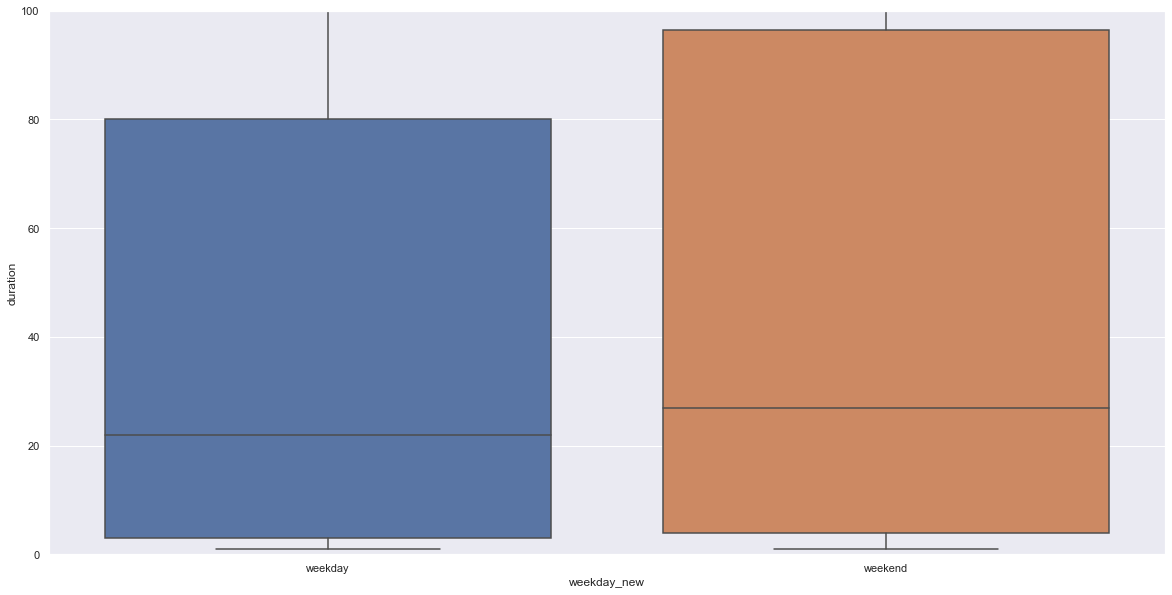

In [254]:
sns.boxplot(x='weekday_new', y='duration', data=ukc300_1)
plt.ylim(0, 100)

(0.0, 100.0)

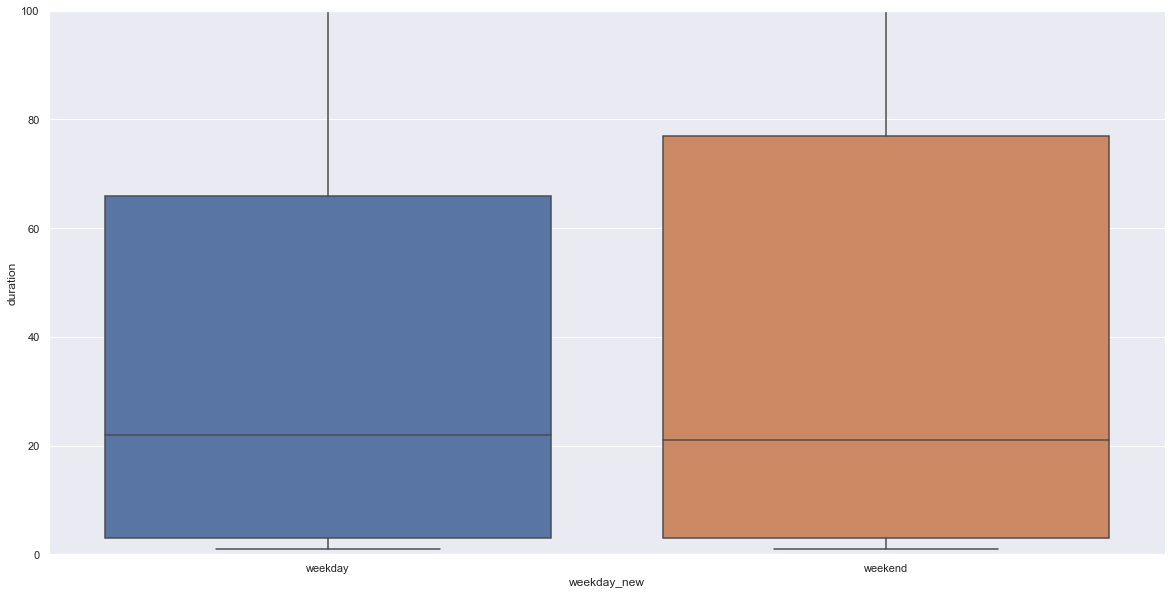

In [255]:
sns.boxplot(x='weekday_new', y='duration', data=ukc300_2)
plt.ylim(0, 100)

In [171]:
#ukc100_1_d = ukc100_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc200_1_d = ukc200_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
ukc300_1_d = ukc300_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc100_2_d = ukc100_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc200_2_d = ukc200_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
ukc300_2_d = ukc300_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()

ukc300_1_d.head(10)

pair  duration_sum
0   (1, 20.0)     84.000000
1    (1, 5.0)     38.000000
2    (1, 8.0)    107.714286
3  (10, 27.0)     12.000000
4  (10, 28.0)     66.750000
5  (10, 31.0)     39.000000
6  (10, 34.0)     38.000000
7  (10, 39.0)     16.000000
8   (10, 6.0)     17.333333
9  (11, 19.0)     24.000000

In [195]:
ukc300_1_d= ukc300_1.groupby(['weekday_new','pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['weekday_new','pair']).agg({ "count","sum", 'mean'})['duration_sum']
ukc300_1_d.head()

mean  count  sum
weekday_new pair                         
weekday     (1, 20.0)   84.00      1   84
            (1, 5.0)    38.00      4  152
            (1, 8.0)    83.00      5  415
            (10, 28.0)  66.75      4  267
            (10, 31.0)  39.00      1   39

In [196]:
ukc300_2_d= ukc300_2.groupby(['weekday_new','pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['weekday_new','pair']).agg({ "count","sum", 'mean'})['duration_sum']
ukc300_2_d.head()

mean  count  sum
weekday_new pair                              
weekday     (1, 16.0)   182.200000      5  911
            (10, 19.0)   72.000000      1   72
            (10, 21.0)   26.000000      2   52
            (10, 23.0)   33.428571      7  234
            (10, 24.0)   53.888889      9  485

In [199]:
ukc300_1_d.to_excel(r'E:\duration2_uk0.xlsx', index = True)

In [200]:
ukc300_2_d.to_excel(r'E:\duration2_uk200.xlsx', index = True)

In [262]:
ukc300_1_d.reset_index(inplace=True)
ukc300_1_d.head()

weekday_new        pair   mean  count  sum
0     weekday   (1, 20.0)  84.00      1   84
1     weekday    (1, 5.0)  38.00      4  152
2     weekday    (1, 8.0)  83.00      5  415
3     weekday  (10, 28.0)  66.75      4  267
4     weekday  (10, 31.0)  39.00      1   39

In [266]:
ukc300_2_d.reset_index(inplace=True)
ukc300_2_d.head()

weekday_new        pair        mean  count  sum
0     weekday   (1, 16.0)  182.200000      5  911
1     weekday  (10, 19.0)   72.000000      1   72
2     weekday  (10, 21.0)   26.000000      2   52
3     weekday  (10, 23.0)   33.428571      7  234
4     weekday  (10, 24.0)   53.888889      9  485

(0.0, 300.0)

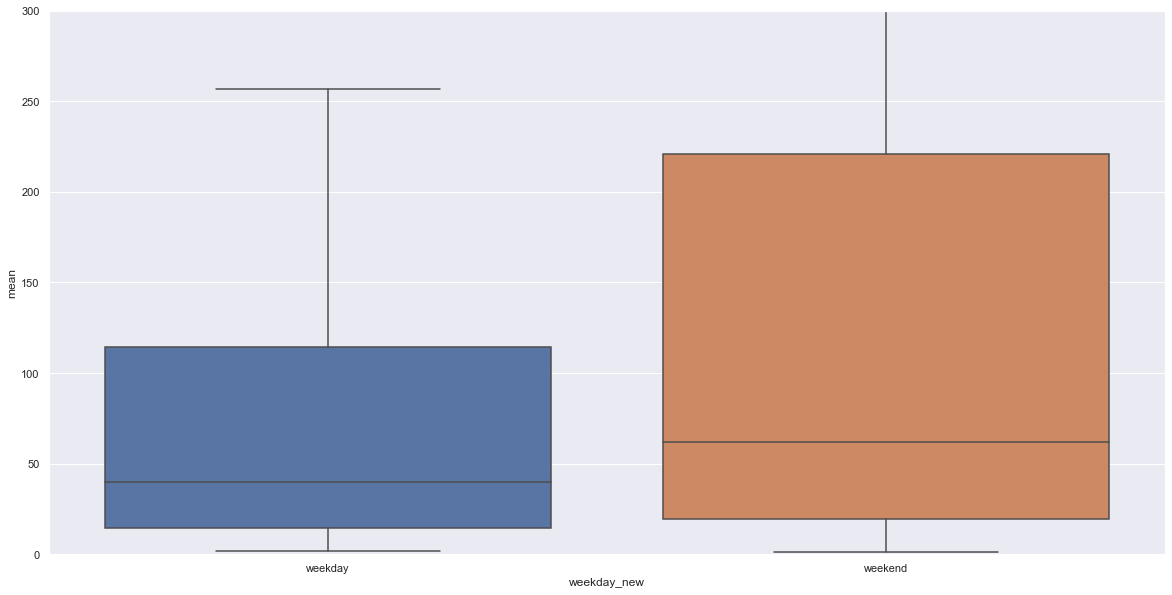

In [265]:
sns.boxplot(x='weekday_new',y='mean', data=ukc300_1_d)
plt.ylim(0, 300)

(0.0, 300.0)

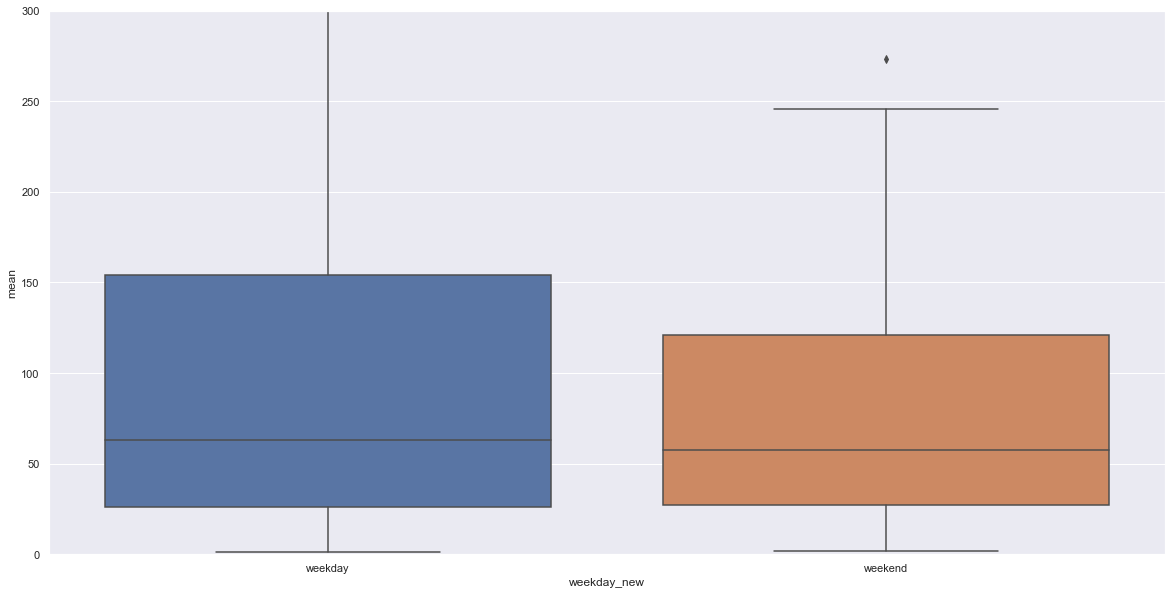

In [267]:
sns.boxplot(x='weekday_new',y='mean', data=ukc300_2_d)
plt.ylim(0, 300)

In [178]:
result_ukc1_12.groupby(['pair','week']).agg({ "count","sum", 'mean'})['duration']

mean  count    sum
pair        week                           
(1, 0.0)    1.0      3.000000      1      3
            4.0      1.500000      2      3
            6.0     22.500000      2     45
            7.0      3.000000      2      6
            8.0     38.400000      5    192
            10.0     9.000000      1      9
            11.0   290.000000      1    290
            12.0    32.000000      1     32
            13.0   130.500000      4    522
            14.0    63.333333      3    190
(1, 1.0)    1.0     54.000000      2    108
            2.0     28.000000      1     28
            4.0     14.000000      1     14
            7.0     79.000000      1     79
            10.0    91.500000      2    183
            11.0    35.500000      2     71
(1, 20.0)   3.0     42.000000      2     84
(1, 5.0)    6.0     46.000000      1     46
            11.0    31.500000      2     63
            15.0     8.000000      1      8
            16.0    35.000000      1     35
(1, 7.0)    1.0     56.500000      4    226
            3.0    139.000000      1    139
            4.0     42.000000      2     84
            6.0     21.111111      9    190
            7.0     58.500000      2    117
            8.0    161.000000      2    322
            9.0      2.500000      2      5
            10.0   471.500000      2    943
            11.0    65.200000      5    326
            13.0   183.055556     18   3295
            14.0     2.000000      1      2
            15.0    60.875000      8    487
(1, 8.0)    1.0     37.666667      3    113
            4.0     10.500000      2     21
            6.0     39.000000      2     78
            7.0     96.000000      2    192
            11.0    18.333333      3     55
            13.0    43.000000      1     43
            15.0    84.000000      3    252
(10, 0.0)   3.0     15.000000      1     15
            5.0     57.000000      1     57
            8.0     37.000000      1     37
            10.0    17.000000      1     17
            11.0    20.000000      1     20
            16.0    21.000000      1     21
            17.0    26.000000      1     26
(10, 1.0)   1.0     28.833333      6    173
            3.0      9.250000      4     37
            6.0     11.000000      1     11
            7.0    104.000000      1    104
            8.0      2.000000      1      2
            9.0     35.750000      4    143
            10.0     8.000000      1      8
            11.0    44.000000      3    132
            12.0    60.333333      3    181
            13.0    17.000000      7    119
            14.0    17.000000      2     34
            15.0    68.000000      2    136
(10, 13.0)  1.0      8.000000      2     16
            2.0     14.000000      1     14
            4.0     22.000000      1     22
            7.0    104.000000      2    208
            8.0     19.250000      4     77
            9.0     32.250000      4    129
            11.0    16.000000      3     48
            15.0    25.500000      2     51
(10, 15.0)  1.0     95.000000      1     95
            2.0     33.875000      8    271
            4.0     35.000000      1     35
            6.0     42.000000      1     42
            7.0     17.833333      6    107
            9.0     44.250000      4    177
            11.0     3.000000      1      3
            14.0     2.000000      1      2
(10, 18.0)  11.0    50.000000      1     50
            13.0     4.000000      1      4
            20.0    31.000000      1     31
            24.0   135.000000      1    135
(10, 27.0)  1.0      4.000000      3     12
(10, 28.0)  1.0     10.000000      3     30
            12.0    96.000000      1     96
            14.0    22.000000      1     22
            15.0   119.000000      1    119
(10, 29.0)  1.0     19.000000      1     19
(10, 3.0)   2.0     46.000000      1     46
            3.0    429.000000      1    429
            4.0    280.666667      3    842
            5.0      9.000000      1      9
            7.0     2

[(0.0, 200.0)]

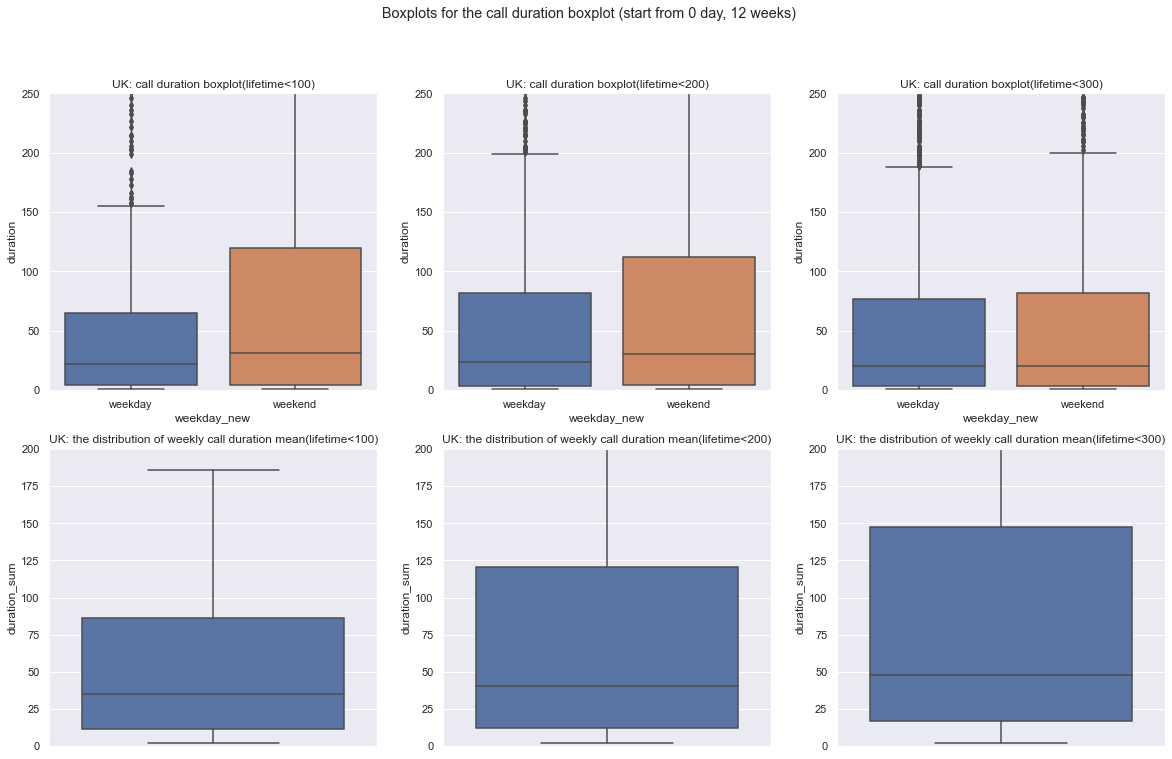

In [102]:
sns.set(rc={'figure.figsize':(20,12)})

fig, axes = plt.subplots(2, 3)
plt.suptitle('Boxplots for the call duration boxplot (start from 0 day, 12 weeks)')
sns.boxplot(x='weekday_new', y='duration', data=ukc100_1, ax=axes[0,0]).set_title("UK: call duration boxplot(lifetime<100)")
sns.boxplot(x='weekday_new', y='duration', data=ukc200_1, ax=axes[0,1]).set_title("UK: call duration boxplot(lifetime<200)")
sns.boxplot(x='weekday_new', y='duration', data=ukc300_1, ax=axes[0,2]).set_title("UK: call duration boxplot(lifetime<300)")

sns.boxplot( y='duration_sum', data=ukc100_1_d, ax=axes[1,0]).set_title("UK: the distribution of weekly call duration mean(lifetime<100)")
sns.boxplot( y='duration_sum', data=ukc200_1_d, ax=axes[1,1]).set_title("UK: the distribution of weekly call duration mean(lifetime<200)")
sns.boxplot(y='duration_sum', data=ukc300_1_d, ax=axes[1,2]).set_title("UK: the distribution of weekly call duration mean(lifetime<300)")


axes[0,0].set(ylim=(0, 250))
#axes[0,0].set(ylabel='number of new alter')
axes[0,1].set(ylim=(0, 250))
#axes[0,2].set(ylabel='number of new alter')
axes[0,2].set(ylim=(0, 250))
#axes[0,2].set(ylabel='number of new alter')
axes[1,0].set(ylim=(0, 200))
#axes[1,0].set(ylabel='average duration of relationship')
axes[1,1].set(ylim=(0, 200))
#axes[1,1].set(ylabel='average duration of relationship')
axes[1,2].set(ylim=(0, 200))
#axes[1,2].set(ylabel='average duration of relationship')

[(0.0, 200.0)]

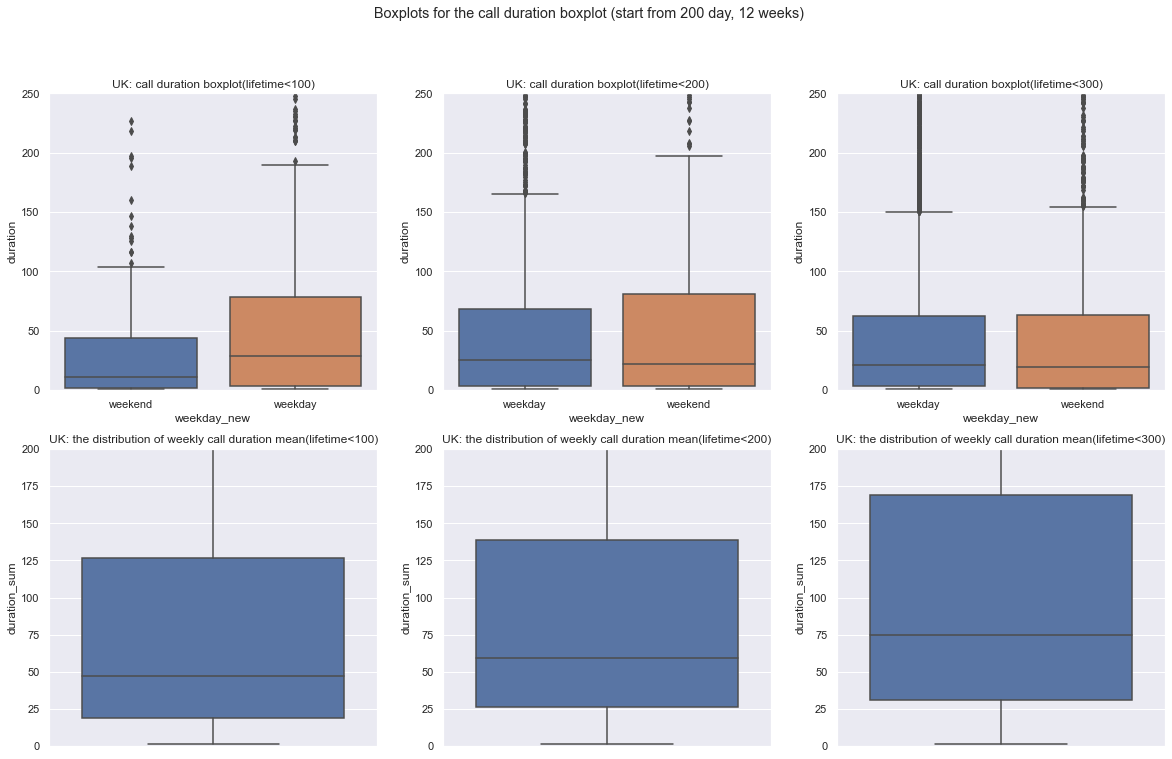

In [104]:
sns.set(rc={'figure.figsize':(20,12)})

fig, axes = plt.subplots(2, 3)
plt.suptitle('Boxplots for the call duration boxplot (start from 200 day, 12 weeks)')
sns.boxplot(x='weekday_new', y='duration', data=ukc100_2, ax=axes[0,0]).set_title("UK: call duration boxplot(lifetime<100)")
sns.boxplot(x='weekday_new', y='duration', data=ukc200_2, ax=axes[0,1]).set_title("UK: call duration boxplot(lifetime<200)")
sns.boxplot(x='weekday_new', y='duration', data=ukc300_2, ax=axes[0,2]).set_title("UK: call duration boxplot(lifetime<300)")

sns.boxplot(y='duration_sum', data=ukc100_2_d, ax=axes[1,0]).set_title("UK: the distribution of weekly call duration mean(lifetime<100)")
sns.boxplot(y='duration_sum', data=ukc200_2_d, ax=axes[1,1]).set_title("UK: the distribution of weekly call duration mean(lifetime<200)")
sns.boxplot(y='duration_sum', data=ukc300_2_d, ax=axes[1,2]).set_title("UK: the distribution of weekly call duration mean(lifetime<300)")

axes[0,0].set(ylim=(0, 250))
#axes[0,0].set(ylabel='number of new alter')
axes[0,1].set(ylim=(0, 250))
#axes[0,2].set(ylabel='number of new alter')
axes[0,2].set(ylim=(0, 250))
#axes[0,2].set(ylabel='number of new alter')
axes[1,0].set(ylim=(0, 200))
#axes[1,0].set(ylabel='average duration of relationship')
axes[1,1].set(ylim=(0, 200))
#axes[1,1].set(ylabel='average duration of relationship')
axes[1,2].set(ylim=(0, 200))
#axes[1,2].set(ylabel='average duration of relationship')

In [225]:
durtion_sum = result_ukc.groupby(['weekday_new','pair']).sum()['duration'].to_frame(name = 'duration_sum').reset_index()
durtion_sum1 =durtion_sum.merge(result_ukc[['ell','pair']], on='pair', how='inner')
durtion_sum1 = durtion_sum1.drop_duplicates(subset=['weekday_new', 'pair'])
durtion_sum1['duration per day'] = durtion_sum1['duration_sum']/(durtion_sum1['ell']+1)
durtion_sum1.head(11)

weekday_new       pair  duration_sum  ell  duration per day
0        weekday   (1, 0.0)         30433  487         62.362705
320      weekend   (1, 0.0)         16496  487         33.803279
640      weekday   (1, 1.0)         36360  481         75.435685
764      weekend   (1, 1.0)         20880  481         43.319502
888      weekday  (1, 12.0)             8   28          0.275862
892      weekday  (1, 14.0)           278   45          6.043478
897      weekend  (1, 14.0)            87   45          1.891304
902      weekday  (1, 15.0)          2890   68         41.884058
951      weekend  (1, 15.0)          3184   68         46.144928
1000     weekday  (1, 16.0)          1631  108         14.963303
1018     weekend  (1, 16.0)           461  108          4.229358

In [226]:
durtion_sum1.to_excel(r'E:\duration3_uk.xlsx', index = True)

In [153]:
durtion_sum = result_ukc.groupby(['weekday','pair']).sum()['duration'].to_frame(name = 'duration_sum').reset_index()
result_ukc =result_ukc.merge(durtion_sum, on='pair', how='left')
result_ukc['duration per day'] = result_ukc['duration_sum']/(result_ukc['ell']+1)
result_ukc = result_ukc.drop_duplicates(subset=['pair', 'duration per day'])
result_ukc.head()

ego  alter      pair  duration    t  a   to  ell  week    weekday  \
0      1    0.0  (1, 0.0)         3    3  0    3  487   1.0   Thursday   
320    1    1.0  (1, 1.0)        24    0  0    0  481   1.0     Monday   
444    1    5.0  (1, 5.0)        46   37  0   37  294   6.0  Wednesday   
452    1    6.0  (1, 6.0)        38  195  0  195  277  28.0     Sunday   
558    1    7.0  (1, 7.0)        28    4  0    4  483   1.0     Friday   

    weekday_start weekday_new weekday_start_new  duration_sum  \
0        Thursday     weekday           weekday         46929   
320        Monday     weekday           weekday         57240   
444     Wednesday     weekday           weekday           211   
452        Sunday     weekend           weekend         27599   
558        Friday     weekday           weekday         25687   

     duration per day  
0           96.165984  
320        118.755187  
444          0.715254  
452         99.276978  
558         53.072314

In [154]:
result_ukc.describe()

ego        alter     duration            t       a  \
count  1734.000000  1734.000000  1734.000000  1734.000000  1734.0   
mean     16.036332   100.588812    78.650519   185.110727     0.0   
std       8.401244    94.695545   235.882139   156.480264     0.0   
min       1.000000     0.000000     1.000000     0.000000     0.0   
25%       8.250000    21.000000     6.000000    22.000000     0.0   
50%      14.000000    61.000000    25.000000   179.500000     0.0   
75%      21.000000   173.000000    66.000000   308.000000     0.0   
max      30.000000   374.000000  3983.000000   530.000000     0.0   

                to          ell         week   duration_sum  duration per day  
count  1734.000000  1734.000000  1734.000000    1734.000000       1734.000000  
mean    185.110727   152.169550    27.038639    3507.904268         47.158251  
std     156.480264   182.390778    22.350335   12813.400159        140.082436  
min       0.000000     0.000000     1.000000       1.000000          0.014583  
25%      22.000000     0.000000     4.000000      40.250000          2.588235  
50%     179.500000    59.000000    26.000000     192.000000         10.204447  
75%     308.000000   280.000000    45.000000    1222.750000         38.825000  
max     530.000000   535.000000    76.000000  224783.000000       3344.000000

(0.0, 100.0)

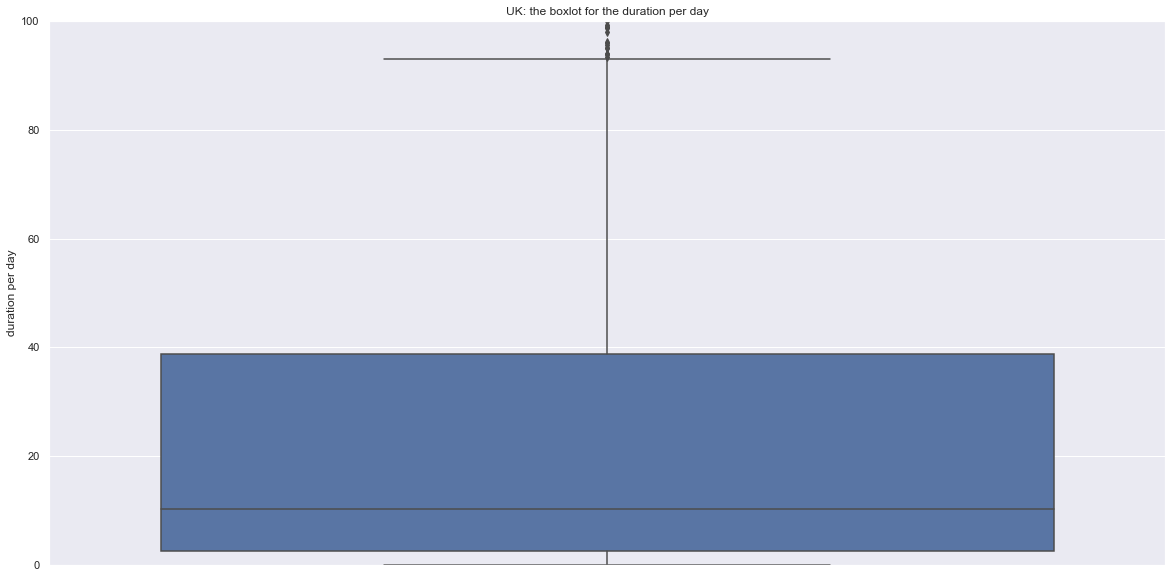

In [160]:
ax = sns.boxplot(y='duration per day', data=result_ukc).set_title("UK: the boxlot for the duration per day")
plt.ylim(0, 100)

# Italy duration call

In [234]:
data['it'].rename(columns={"t": "t_old", "tau": "t"},inplace=True)
data['it'].head()

ego                alter                 pair                time  \
0  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac 2013-02-27 13:23:21   
1  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac 2013-04-10 14:35:41   
2  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac 2013-04-16 11:48:54   
3  0x55  -0x1000d90f7dae0fa8  -0x68b924e06dfa34ab 2013-03-22 19:17:05   
4  0x55  -0x1000d90f7dae0fa8  -0x68b924e06dfa34ab 2013-03-22 19:18:24   

        date  duration  t_old   a relationship   t  
0 2013-02-27       159     26   0          NaN   7  
1 2013-04-10        58     68  42          NaN  49  
2 2013-04-16       265     74  48          NaN  55  
3 2013-03-22        56     49   0          NaN  44  
4 2013-03-22        19     49   0          NaN  44

In [235]:
data['it'] = data['it'][['ego','alter','pair','duration','t','a']]
lf = data['it'].groupby('pair')[['a']].max()
to = data['it'].groupby('pair')[['t']].min()
df = to.merge(lf, left_index=True, right_index=True, how='left').rename({'t': 'to', 'a': 'ell'}, axis='columns')
result_it = data['it'].merge(df, on='pair', how='left')
for nw in [7 * weeks for weeks in list(range(1,79))]:
    result_it.loc[(result_it['t'] >= 0 + nw -7) & (result_it['t'] < 0 + nw),'week'] = nw // 7
result_it['weekday'] = result_it['t'].map(lambda x: weekdays['it'][x])
result_it['weekday_start'] = result_it['to'].map(lambda x: weekdays['it'][x])
result_it['weekday_new'] = np.where(result_it['weekday']
                                   .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
result_it['weekday_start_new'] = np.where(result_it['weekday_start']
                                   .isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
result_it.head()

ego                alter                 pair  duration   t   a  to  ell  \
0  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac       159   7   0   7   48   
1  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac        58  49  42   7   48   
2  0x34  -0x1000d90f7dae0fa8  -0x19296537113595ac       265  55  48   7   48   
3  0x55  -0x1000d90f7dae0fa8  -0x68b924e06dfa34ab        56  44   0  44    1   
4  0x55  -0x1000d90f7dae0fa8  -0x68b924e06dfa34ab        19  44   0  44    1   

   week   weekday weekday_start weekday_new weekday_start_new  
0   2.0    Friday        Friday     weekday           weekday  
1   8.0    Friday        Friday     weekday           weekday  
2   8.0  Thursday        Friday     weekday           weekday  
3   7.0    Sunday        Sunday     weekend           weekend  
4   7.0    Sunday        Sunday     weekend           weekend

In [236]:
result_it = result_it.loc[result_it['a']<100] #control the window day=100

In [237]:
# 12 weeks data (start day0)
result_it1_12 = result_it.loc[(result_it['to'] >= 0) & (result_it['to'] < 84)]

# 12 weeks data (start day200)
result_it2_12 = result_it.loc[(result_it['to'] >= 200) & (result_it['to'] < 200 + 84)]

In [238]:
#ukc100_1=result_ukc1_12.loc[result_ukc1_12['ell'] <100]
#ukc200_1=result_ukc1_12.loc[result_ukc1_12['ell'] <200]
it300_1=result_it1_12.loc[result_it1_12['ell'] <300]
#ukc100_2=result_ukc2_12.loc[result_ukc2_12['ell'] <100]
#ukc200_2=result_ukc2_12.loc[result_ukc2_12['ell'] <200]
it300_2=result_it2_12.loc[result_it2_12['ell'] <300]

In [239]:
it300_1.to_excel(r'E:\duration1_it0.xlsx', index = False)

In [240]:
it300_2.to_excel(r'E:\duration1_it200.xlsx', index = False)

(0.0, 200.0)

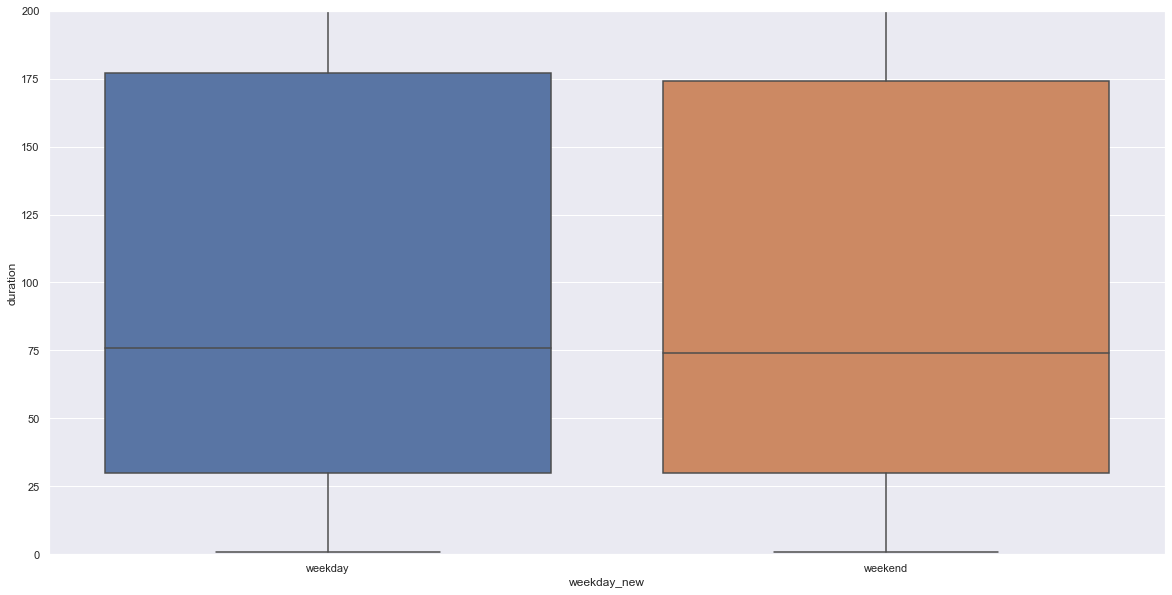

In [257]:
sns.boxplot(x='weekday_new', y='duration', data=it300_1)
plt.ylim(0, 200)

(0.0, 200.0)

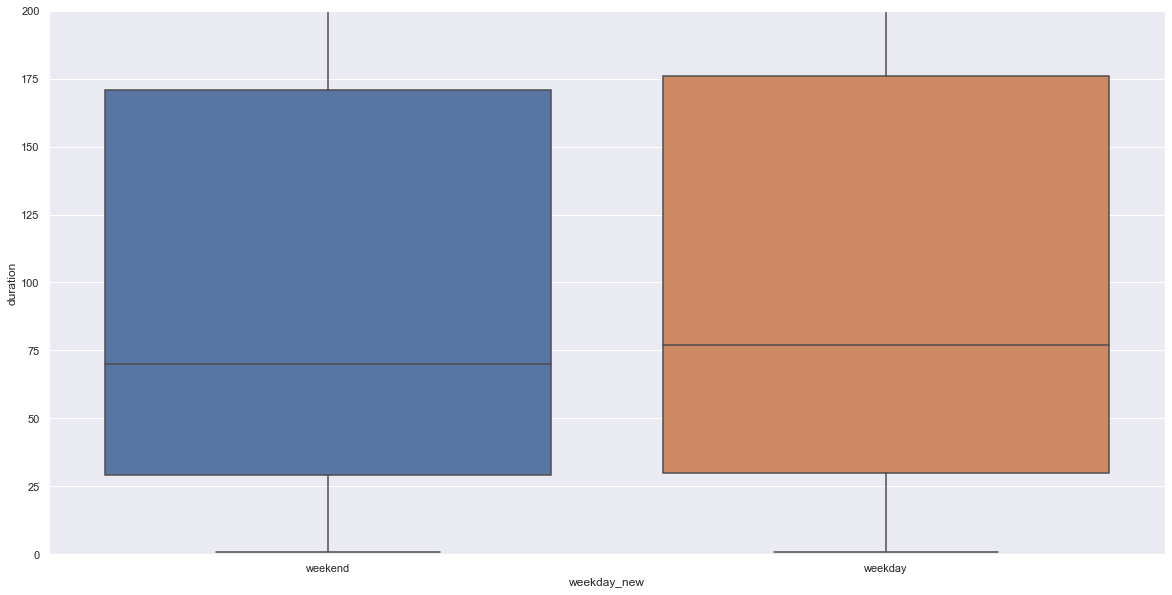

In [258]:
sns.boxplot(x='weekday_new', y='duration', data=it300_2)
plt.ylim(0, 200)

In [241]:
#ukc100_1_d = ukc100_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc200_1_d = ukc200_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
it300_1_d = it300_1.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc100_2_d = ukc100_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
#ukc200_2_d = ukc200_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()
it300_2_d = it300_2.groupby(['pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['pair']).mean()['duration_sum'].to_frame(name = 'duration_sum').reset_index()

it300_1_d.head(10)

pair  duration_sum
0  -0x101adb948cd6359e     15.000000
1  -0x1037fb0ad37ae012     41.000000
2  -0x103cd5bd5d24629b    129.500000
3  -0x10480d6d006e8202     56.000000
4  -0x1063ecf3dfd9d597    698.000000
5   -0x10689d70b70536f    529.000000
6  -0x10726cff468a950c     17.000000
7  -0x10772338797e909a    299.250000
8  -0x107b010a12b0116b    414.666667
9  -0x108292d92cb06b9d     43.000000

In [244]:
it300_1_d= it300_1.groupby(['weekday_new','pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['weekday_new','pair']).agg({ "count","sum", 'mean'})['duration_sum']
it300_1_d.head()

mean  count  sum
weekday_new pair                                  
weekday     -0x101adb948cd6359e   15.0      1   15
            -0x103cd5bd5d24629b  119.0      1  119
            -0x10480d6d006e8202   56.0      1   56
            -0x1063ecf3dfd9d597  698.0      1  698
            -0x10689d70b70536f   529.0      1  529

In [246]:
it300_2_d= it300_2.groupby(['weekday_new','pair','week']).sum()['duration'].to_frame(name = 'duration_sum').reset_index().groupby(['weekday_new','pair']).agg({ "count","sum", 'mean'})['duration_sum']
it300_2_d.head()

mean  count  sum
weekday_new pair                                       
weekday     -0x101518fb4a671024   70.000000      1   70
            -0x101980bc7907ee0d  136.000000      1  136
            -0x104405f352b7008f   53.000000      1   53
            -0x108a006b67041c51   92.666667      3  278
            -0x108cc28f4a58fd43  170.000000      1  170

In [248]:
it300_1_d.to_excel(r'E:\duration2_it0.xlsx', index = True)

In [249]:
it300_2_d.to_excel(r'E:\duration2_it200.xlsx', index = True)

In [269]:
it300_1_d.reset_index(inplace=True)
it300_1_d.head()

weekday_new                 pair   mean  count  sum
0     weekday  -0x101adb948cd6359e   15.0      1   15
1     weekday  -0x103cd5bd5d24629b  119.0      1  119
2     weekday  -0x10480d6d006e8202   56.0      1   56
3     weekday  -0x1063ecf3dfd9d597  698.0      1  698
4     weekday   -0x10689d70b70536f  529.0      1  529

In [268]:
it300_2_d.reset_index(inplace=True)
it300_2_d.head()

weekday_new                 pair        mean  count  sum
0     weekday  -0x101518fb4a671024   70.000000      1   70
1     weekday  -0x101980bc7907ee0d  136.000000      1  136
2     weekday  -0x104405f352b7008f   53.000000      1   53
3     weekday  -0x108a006b67041c51   92.666667      3  278
4     weekday  -0x108cc28f4a58fd43  170.000000      1  170

(0.0, 200.0)

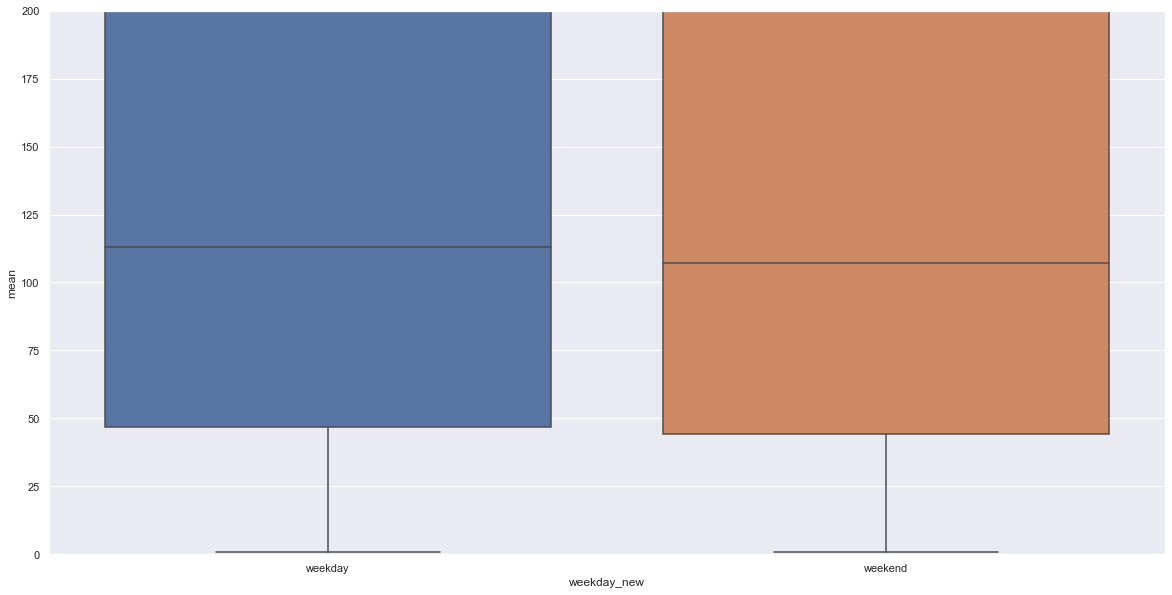

In [270]:
sns.boxplot(x='weekday_new', y='mean', data=it300_1_d)
plt.ylim(0, 200)

(0.0, 200.0)

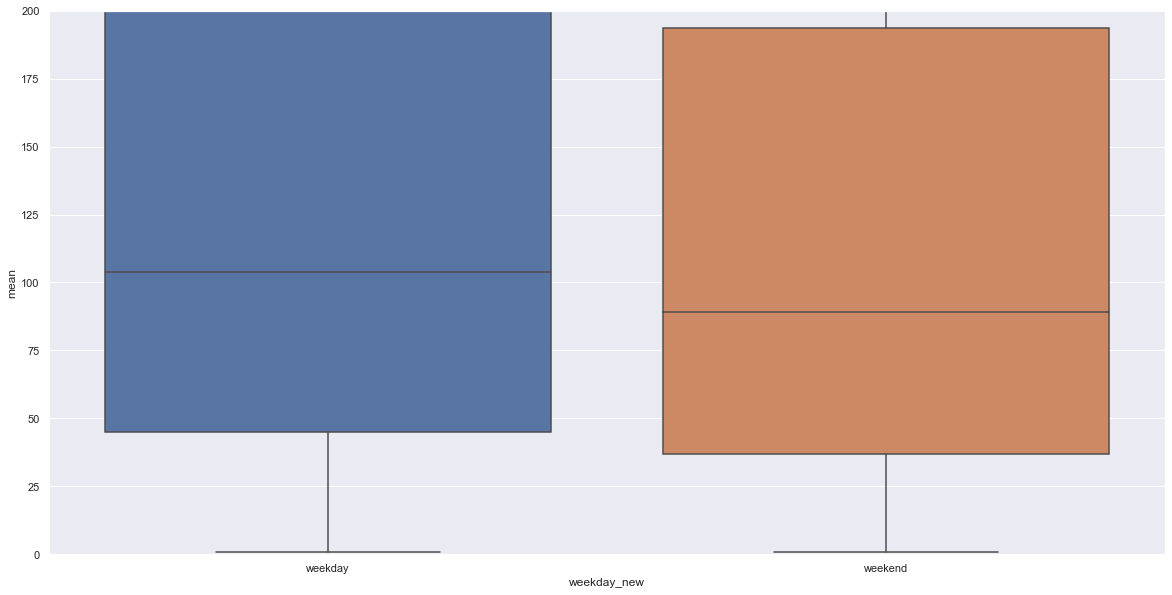

In [271]:
sns.boxplot(x='weekday_new', y='mean', data=it300_2_d)
plt.ylim(0, 200)

In [250]:
result_it1_12.groupby(['pair','week']).agg({ "count","sum", 'mean'})['duration']

mean  count    sum
pair                week                           
-0x101837c468b70dab 1.0    226.000000      1    226
-0x101adb948cd6359e 7.0     15.000000      1     15
-0x10235533a1edcad  2.0    130.666667      3    392
-0x1030f7777c1d983f 8.0    143.000000      1    143
-0x1037fb0ad37ae012 10.0    41.000000      1     41
-0x103cd5bd5d24629b 3.0    140.000000      1    140
                    5.0     59.500000      2    119
-0x10480d6d006e8202 3.0     56.000000      1     56
-0x1063ecf3dfd9d597 1.0    349.000000      2    698
-0x10689d70b70536f  9.0    529.000000      1    529
-0x10693f9ec922086d 11.0   123.000000      1    123
-0x10726cff468a950c 2.0     17.000000      1     17
-0x10772338797e909a 1.0    261.000000      3    783
                    3.0    302.000000      1    302
                    4.0    329.000000      1    329
                    7.0    191.000000      1    191
                    9.0    171.000000      1    171
                    10.0   152.000000      1    152
                    12.0   147.000000      1    147
                    13.0   159.500000      2    319
-0x1079b8405f713e7a 1.0     81.000000      1     81
                    15.0    91.000000      1     91
-0x107b010a12b0116b 8.0    269.000000      2    538
                    16.0   629.000000      1    629
                    19.0    77.000000      1     77
-0x107f652df53257b9 3.0     34.000000      1     34
                    7.0     81.000000      2    162
                    8.0     24.500000      2     49
                    11.0   236.000000      1    236
                    12.0   315.500000      2    631
                    13.0    25.000000      1     25
                    14.0    77.000000      3    231
                    15.0    79.500000      2    159
-0x108292d92cb06b9d 1.0     43.000000      1     43
-0x109483ce89f28ad2 10.0    43.000000      1     43
-0x10b8c4f73789e7d4 1.0     79.833333     12    958
                    2.0     79.000000      1     79
                    3.0     31.666667      6    190
                    4.0     41.363636     11    455
                    5.0     41.666667      3    125
                    6.0     38.500000      2     77
-0x10b97419a34ed795 11.0   121.000000      1    121
-0x10c3dd673f0283b2 9.0     38.000000      1     38
-0x10c405e94e62b4c6 3.0    272.000000      1    272
                    14.0   247.666667      3    743
-0x10c5e2ff76a66293 12.0    20.000000      2     40
-0x10c7e7d01187f8b6 5.0     71.500000      2    143
                    14.0    96.000000      1     96
-0x10ddaeccf1893b84 4.0    151.000000      1    151
-0x10e82f2d3bf6234b 12.0   232.000000      1    232
-0x10f7331761694586 10.0    14.000000      1     14
-0x10fa70835b44ab49 9.0    273.000000      1    273
                    13.0   203.000000      2    406
-0x11111536606d18a8 6.0    258.000000      1    258
-0x1114eb6b61093aec 12.0    46.000000      1     46
-0x111ca8f0e438d63a 6.0     71.000000      1     71
                    9.0     48.000000      1     48
                    16.0    10.000000      1     10
                    17.0   107.000000      1    107
-0x112ad8700ab4cc94 7.0     14.000000      1     14
-0x113206d413f6cd33 4.0     19.000000      1     19
-0x113dd4dc0e37e611 1.0      5.000000      1      5
                    13.0     3.000000      1      3
                    15.0     8.000000      1      8
-0x114508bf8412efd2 11.0    15.000000      1     15
-0x11560f509fc9cacd 8.0     51.000000      1     51
-0x117b90df07c3bc98 9.0    140.333333      3    421
                    14.0    24.000000      1     24
                    16.0   312.000000      1    312
                    19.0   100.000000      1    100
                    22.0    29.000000      1     29
                    23.0    51.000000      1     51
-0x117ce0fb88f73c33 7.0     82.000000      1     82
                    15.0    52.000000      1     52
-0x118dd937db536538 1.0    131.000000      1    131
-0x119c1ed40826075c 7.0    10

In [251]:
durtion_sum = result_it.groupby(['weekday_new','pair']).sum()['duration'].to_frame(name = 'duration_sum').reset_index()
durtion_sum1 =durtion_sum.merge(result_it[['ell','pair']], on='pair', how='inner')
durtion_sum1 = durtion_sum1.drop_duplicates(subset=['weekday_new', 'pair'])
durtion_sum1['duration per day'] = durtion_sum1['duration_sum']/(durtion_sum1['ell']+1)
durtion_sum1.head(11)

weekday_new                 pair  duration_sum  ell  duration per day
0      weekday  -0x100247471eac171b           111    0        111.000000
1      weekday  -0x1007c22a9e2961dd           243    3         60.750000
4      weekend  -0x1007c22a9e2961dd           118    3         29.500000
7      weekday  -0x100f3da76b4bb7d7           107  186          0.572193
8      weekday  -0x101469d1516378e3           146    0        146.000000
9      weekday  -0x101518fb4a671024            70    0         70.000000
10     weekday  -0x101837c468b70dab           226  427          0.528037
11     weekday  -0x101980bc7907ee0d           136    0        136.000000
12     weekday  -0x101adb948cd6359e            15    0         15.000000
13     weekday   -0x10235533a1edcad           392  595          0.657718
16     weekday  -0x102572461b43174a             6  106          0.056075

In [252]:
durtion_sum1.to_excel(r'E:\duration3_uk.xlsx', index = True)

In [4]:
t0 = dt.datetime.now()
weekdays = {}
for c in data.keys():
    df = data[c].copy(deep=True)
    df['weekday'] = df['date'].map(lambda i: i.day_name())
    weekdays[c] = {}
    for t in df['t'].unique():
        df1 = df.loc[df['t'] == t]
        weekdays[c][t] = df1.iloc[0]['weekday']
        

In [5]:
def get_teeth(calls, tau=False):
    lf = calls.groupby('pair')[['a']].max()
    if tau:
        to = calls.groupby('pair')[['tau']].min().rename({'tau': 't', 'a': 'ell'}, axis='columns')
    else:
        to = calls.groupby('pair')[['t']].min()
    df = to.merge(lf, left_index=True, right_index=True, how='left').rename({'t': 'to', 'a': 'ell'}, axis='columns')
    df = df.sort_values(by=['to', 'ell']).reset_index()
    df['x'] = df['to'] + df.index
    result = pd.DataFrame()
    for t in df['to'].unique():
        tdf = df.loc[df['to'] == t].reset_index(drop=True)
        tdf['ac'] = tdf.index
        result = result.append(tdf)
    result = result.reset_index(drop=True)
    at = result.groupby('to')['pair'].count()
    result['xrel'] = result.index.map(lambda i: (result.at[i, 'ac'] / at[result.at[i, 'to']]) + result.at[i, 'to'])
    return result

In [6]:
teeth = {}
for c in data.keys():
    df = get_teeth(data[c])
    teeth[c] = df

# UK (DAY0)

In [7]:
teeth['ukc'].describe()

to          ell            x           ac         xrel
count  1734.000000  1734.000000  1734.000000  1734.000000  1734.000000
mean    185.110727   152.169550  1051.610727     5.332757   185.483564
std     156.480264   182.390778   655.083931     9.506793   156.425630
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      22.000000     0.000000   455.250000     0.000000    22.225000
50%     179.500000    59.000000  1046.000000     2.000000   179.875000
75%     308.000000   280.000000  1607.750000     5.000000   308.375000
max     530.000000   535.000000  2263.000000    58.000000   530.000000

In [8]:
data['ukc1'] = data['ukc'].loc[data['ukc']['a']<100] #control the window day=100

In [9]:
data['ukc1'].head()

ego  alter      pair                time       date  duration   t   a  \
0    1    0.0  (1, 0.0) 2007-03-08 11:26:00 2007-03-08         3   3   0   
1    1    0.0  (1, 0.0) 2007-03-30 09:48:00 2007-03-30         1  25  22   
2    1    0.0  (1, 0.0) 2007-03-31 13:23:00 2007-03-31         2  26  23   
3    1    0.0  (1, 0.0) 2007-04-11 09:44:00 2007-04-11         3  37  34   
4    1    0.0  (1, 0.0) 2007-04-11 10:49:00 2007-04-11        42  37  34   

   efemale  afemale  related  sameGen   ec1   ec2  ec3  
0        0      1.0      1.0      0.0  10.0  10.0  8.0  
1        0      1.0      1.0      0.0  10.0  10.0  8.0  
2        0      1.0      1.0      0.0  10.0  10.0  8.0  
3        0      1.0      1.0      0.0  10.0  10.0  8.0  
4        0      1.0      1.0      0.0  10.0  10.0  8.0

In [10]:
data['ukc1']['weekday'] = data['ukc1']['t'].map(lambda x: weekdays['ukc'][x])#find weekday
a = data['ukc1'].loc[(data['ukc1']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
a.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=a[['pair','weekday_start']]
merged = pd.merge(data['ukc1'], aa, left_on='pair', right_on='pair')

In [11]:
pd.options.display.max_rows = None
merged.head(50)

ego  alter      pair                time       date  duration    t   a  \
0     1    0.0  (1, 0.0) 2007-03-08 11:26:00 2007-03-08         3    3   0   
1     1    0.0  (1, 0.0) 2007-03-30 09:48:00 2007-03-30         1   25  22   
2     1    0.0  (1, 0.0) 2007-03-31 13:23:00 2007-03-31         2   26  23   
3     1    0.0  (1, 0.0) 2007-04-11 09:44:00 2007-04-11         3   37  34   
4     1    0.0  (1, 0.0) 2007-04-11 10:49:00 2007-04-11        42   37  34   
5     1    0.0  (1, 0.0) 2007-04-20 16:39:00 2007-04-20         4   46  43   
6     1    0.0  (1, 0.0) 2007-04-20 16:48:00 2007-04-20         2   46  43   
7     1    0.0  (1, 0.0) 2007-04-24 15:17:00 2007-04-24         4   50  47   
8     1    0.0  (1, 0.0) 2007-04-24 16:19:00 2007-04-24         2   50  47   
9     1    0.0  (1, 0.0) 2007-04-25 13:03:00 2007-04-25         2   51  48   
10    1    0.0  (1, 0.0) 2007-04-25 17:50:00 2007-04-25        34   51  48   
11    1    0.0  (1, 0.0) 2007-04-27 16:43:00 2007-04-27       150   53  50   
12    1    0.0  (1, 0.0) 2007-05-12 13:39:00 2007-05-12         9   68  65   
13    1    0.0  (1, 0.0) 2007-05-17 16:16:00 2007-05-17       290   73  70   
14    1    0.0  (1, 0.0) 2007-05-23 09:40:00 2007-05-23        32   79  76   
15    1    0.0  (1, 0.0) 2007-05-28 18:29:00 2007-05-28        82   84  81   
16    1    0.0  (1, 0.0) 2007-05-30 17:15:00 2007-05-30         3   86  83   
17    1    0.0  (1, 0.0) 2007-05-31 18:29:00 2007-05-31         2   87  84   
18    1    0.0  (1, 0.0) 2007-06-03 21:48:00 2007-06-03       435   90  87   
19    1    0.0  (1, 0.0) 2007-06-04 18:58:00 2007-06-04         2   91  88   
20    1    0.0  (1, 0.0) 2007-06-09 01:20:00 2007-06-09         3   96  93   
21    1    0.0  (1, 0.0) 2007-06-10 14:06:00 2007-06-10       185   97  94   
22    1    1.0  (1, 1.0) 2007-03-05 15:24:00 2007-03-05        24    0   0   
23    1    1.0  (1, 1.0) 2007-03-10 12:54:00 2007-03-10        84    5   5   
24    1    1.0  (1, 1.0) 2007-03-12 15:38:00 2007-03-12        28    7   7   
25    1    1.0  (1, 1.0) 2007-03-31 13:34:00 2007-03-31        14   26  26   
26    1    1.0  (1, 1.0) 2007-04-19 19:03:00 2007-04-19        79   45  45   
27    1    1.0  (1, 1.0) 2007-05-09 10:59:00 2007-05-09        97   65  65   
28    1    1.0  (1, 1.0) 2007-05-12 13:04:00 2007-05-12        86   68  68   
29    1    1.0  (1, 1.0) 2007-05-16 21:00:00 2007-05-16        38   72  72   
30    1    1.0  (1, 1.0) 2007-05-17 16:25:00 2007-05-17        33   73  73   
31    1    5.0  (1, 5.0) 2007-04-11 09:33:00 2007-04-11        46   37   0   
32    1    5.0  (1, 5.0) 2007-05-16 08:23:00 2007-05-16        45   72  35   
33    1    5.0  (1, 5.0) 2007-05-18 18:47:00 2007-05-18        18   74  37   
34    1    5.0  (1, 5.0) 2007-06-15 18:13:00 2007-06-15         8  102  65   
35    1    5.0  (1, 5.0) 2007-06-20 07:47:00 2007-06-20        35  107  70   
36    1    6.0  (1, 6.0) 2007-09-16 14:01:00 2007-09-16        38  195   0   
37    1    6.0  (1, 6.0) 2007-09-20 22:10:00 2007-09-20        19  199   4   
38    1    6.0  (1, 6.0) 2007-09-25 22:49:00 2007-09-25        54  204   9   
39    1    6.0  (1, 6.0) 2007-09-26 18:23:00 2007-09-26        62  205  10   
40    1    6.0  (1, 6.0) 2007-09-27 14:51:00 2007-09-27        57  206  11   
41    1    6.0  (1, 6.0) 2007-09-27 17:15:00 2007-09-27       107  206  11   
42    1    6.0  (1, 6.0) 2007-09-28 17:18:00 2007-09-28       112  207  12   
43    1    6.0  (1, 6.0) 2007-09-28 20:22:00 2007-09-28       290  207  12   
44    1    6.0  (1, 6.0) 2007-09-29 18:56:00 2007-09-29         2  208  13   
45    1    6.0  (1, 6.0) 2007-09-29 20:52:00 2007-09-29        75  208  13   
46    1    6.0  (1, 6.0) 2007-09-30 11:10:00 2007-09-30       329  209  14   
47    1    6.0  (1, 6.0) 2007-09-30 12:33:00 2007-09-30         2  209  14   
48    1    6.0  (1, 6.0) 2007-09-30 12:39:00 2007-09-30       166  209  14   
49    1    6.0  (1, 6.0) 2007-10-03 14:49:00 2007-10-03        56  212  17   

    efemale  afemale  rel

In [12]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [13]:
merged.head()

ego  alter      pair                time       date  duration   t   a  \
0    1    0.0  (1, 0.0) 2007-03-08 11:26:00 2007-03-08         3   3   0   
1    1    0.0  (1, 0.0) 2007-03-30 09:48:00 2007-03-30         1  25  22   
2    1    0.0  (1, 0.0) 2007-03-31 13:23:00 2007-03-31         2  26  23   
3    1    0.0  (1, 0.0) 2007-04-11 09:44:00 2007-04-11         3  37  34   
4    1    0.0  (1, 0.0) 2007-04-11 10:49:00 2007-04-11        42  37  34   

   efemale  afemale  related  sameGen   ec1   ec2  ec3    weekday  \
0        0      1.0      1.0      0.0  10.0  10.0  8.0   Thursday   
1        0      1.0      1.0      0.0  10.0  10.0  8.0     Friday   
2        0      1.0      1.0      0.0  10.0  10.0  8.0   Saturday   
3        0      1.0      1.0      0.0  10.0  10.0  8.0  Wednesday   
4        0      1.0      1.0      0.0  10.0  10.0  8.0  Wednesday   

  weekday_start weekday_new weekday_start_new  
0      Thursday     weekday           weekday  
1      Thursday     weekday           weekday  
2      Thursday     weekend           weekday  
3      Thursday     weekday           weekday  
4      Thursday     weekday           weekday

In [24]:
duration_mean1= merged.groupby('weekday_new').mean()['duration']#.to_frame(name = 'duration').reset_index()
duration_mean1

weekday_new
weekday     93.661335
weekend    112.671262
Name: duration, dtype: float64

In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,round(y[i], 2))

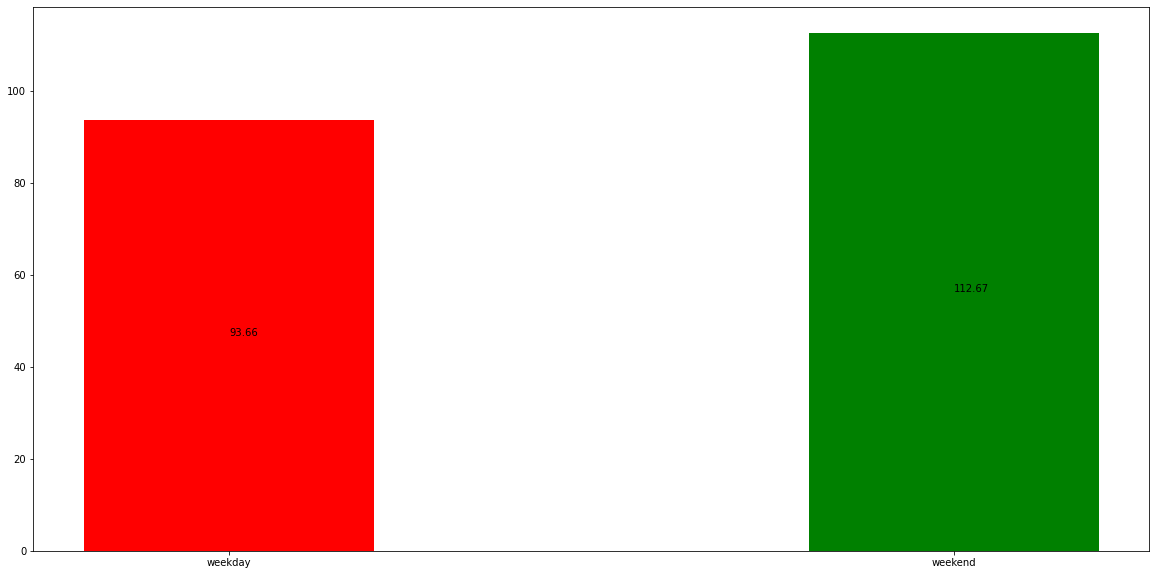

In [20]:
#plt.bar(duration_mean1['weekday_new'], duration_mean1['duration'],color=['red', 'green'],width = 0.4)
#plt.xticks(rotation = 0)
#addlabels(duration_mean1['weekday_new'], duration_mean1['duration'])
#plt.show()

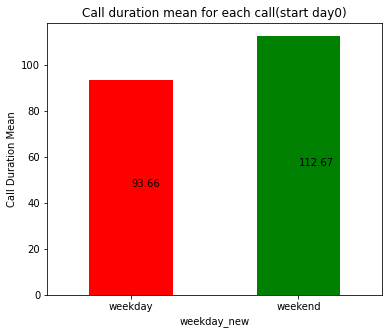

In [26]:
duration_mean1.plot(kind='bar', title='Call duration mean for each call(start day0)', ylabel='Call Duration Mean', color=['red', 'green'],figsize=(6, 5))
plt.xticks(rotation = 0)
addlabels(duration_mean1.index, duration_mean1.values)


In [51]:
merged.groupby('weekday_start_new').mean()['duration']

weekday_start_new
weekday    99.233943
weekend    95.423077
Name: duration, dtype: float64

In [52]:
merged.groupby(['pair','weekday_new']).mean()['duration']

pair         weekday_new
(1, 0.0)     weekday          38.705882
             weekend         126.800000
(1, 1.0)     weekday          49.833333
             weekend          61.333333
(1, 12.0)    weekday           2.000000
(1, 14.0)    weekday          69.500000
             weekend          87.000000
(1, 15.0)    weekday          99.655172
             weekend         159.200000
(1, 16.0)    weekday          82.818182
             weekend          92.200000
(1, 20.0)    weekday          42.000000
(1, 5.0)     weekday          30.400000
(1, 6.0)     weekday         196.000000
             weekend         205.500000
(1, 7.0)     weekday          70.694444
             weekend         179.550000
(1, 8.0)     weekday          46.111111
             weekend          48.428571
(10, 0.0)    weekday          22.666667
             weekend          57.000000
(10, 1.0)    weekday          36.000000
             weekend          19.636364
(10, 11.0)   weekday          43.000000
             we

In [53]:
duration_mean2=merged.groupby(['pair','weekday_start_new']).mean()['duration'].groupby(['weekday_start_new']).mean()
duration_mean2

weekday_start_new
weekday    75.309425
weekend    92.021729
Name: duration, dtype: float64

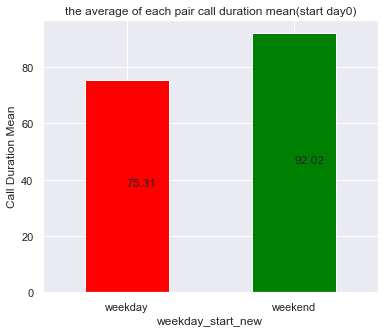

In [54]:
duration_mean2.plot(kind='bar', title='the average of each pair call duration mean(start day0)', ylabel='Call Duration Mean', color=['red', 'green'],figsize=(6, 5))
plt.xticks(rotation = 0)
addlabels(duration_mean2.index, duration_mean2.values)

# UK 200

In [55]:
b = a.loc[a['t'] >=200,'pair']
merged_new = merged[merged['pair'].isin(b)]
merged_new.head()

ego  alter       pair                time       date  duration    t   a  \
155    1   12.0  (1, 12.0) 2008-06-03 18:17:00 2008-06-03         2  456   0   
156    1   12.0  (1, 12.0) 2008-06-03 18:41:00 2008-06-03         2  456   0   
157    1   12.0  (1, 12.0) 2008-07-01 16:59:00 2008-07-01         2  484  28   
158    1   12.0  (1, 12.0) 2008-07-01 17:23:00 2008-07-01         2  484  28   
159    1   14.0  (1, 14.0) 2008-05-14 14:36:00 2008-05-14        16  436   0   

     efemale  afemale  related  sameGen  ec1  ec2  ec3    weekday  \
155        0      0.0      0.0      NaN  NaN  8.0  6.0    Tuesday   
156        0      0.0      0.0      NaN  NaN  8.0  6.0    Tuesday   
157        0      0.0      0.0      NaN  NaN  8.0  6.0    Tuesday   
158        0      0.0      0.0      NaN  NaN  8.0  6.0    Tuesday   
159        0      0.0      0.0      NaN  NaN  NaN  6.0  Wednesday   

    weekday_start weekday_new weekday_start_new  
155       Tuesday     weekday           weekday  
156       Tuesday     weekday           weekday  
157       Tuesday     weekday           weekday  
158       Tuesday     weekday           weekday  
159     Wednesday     weekday           weekday

In [56]:
duration_mean3= merged_new.groupby('weekday_new').mean()['duration']
duration_mean3

weekday_new
weekday    75.693759
weekend    82.441612
Name: duration, dtype: float64

In [57]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,round(y[i], 2))

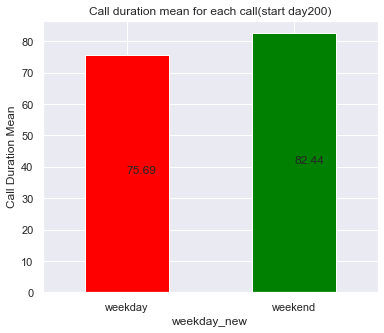

In [58]:
duration_mean3.plot(kind='bar', title='Call duration mean for each call(start day200)', ylabel='Call Duration Mean', color=['red', 'green'],figsize=(6, 5))
plt.xticks(rotation = 0)
addlabels(duration_mean3.index, duration_mean3.values)

In [59]:
merged.groupby('weekday_start_new').mean()['duration']

weekday_start_new
weekday    99.233943
weekend    95.423077
Name: duration, dtype: float64

In [60]:
merged_new.groupby(['pair','weekday_new']).mean()['duration']

pair         weekday_new
(1, 12.0)    weekday           2.000000
(1, 14.0)    weekday          69.500000
             weekend          87.000000
(1, 15.0)    weekday          99.655172
             weekend         159.200000
(1, 16.0)    weekday          82.818182
             weekend          92.200000
(10, 14.0)   weekday          23.714286
(10, 16.0)   weekend          23.000000
(10, 17.0)   weekday           6.800000
             weekend           3.000000
(10, 19.0)   weekday          72.000000
(10, 21.0)   weekday          26.000000
(10, 23.0)   weekday          13.764706
             weekend          13.750000
(10, 24.0)   weekday          17.962963
             weekend          12.250000
(10, 25.0)   weekday           4.500000
(10, 35.0)   weekday           2.000000
(10, 42.0)   weekday          83.000000
(10, 43.0)   weekday          32.000000
             weekend          10.000000
(10, 45.0)   weekday          38.600000
(10, 7.0)    weekday          18.050000
             we

In [61]:
duration_mean4=merged_new.groupby(['pair','weekday_start_new']).mean()['duration'].groupby(['weekday_start_new']).mean()
duration_mean4

weekday_start_new
weekday    67.178362
weekend    66.592093
Name: duration, dtype: float64

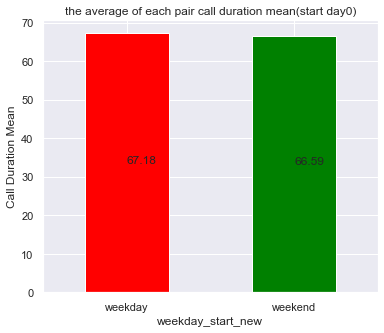

In [62]:
duration_mean4.plot(kind='bar', title='the average of each pair call duration mean(start day0)', ylabel='Call Duration Mean', color=['red', 'green'],figsize=(6, 5))
plt.xticks(rotation = 0)
addlabels(duration_mean4.index, duration_mean4.values)

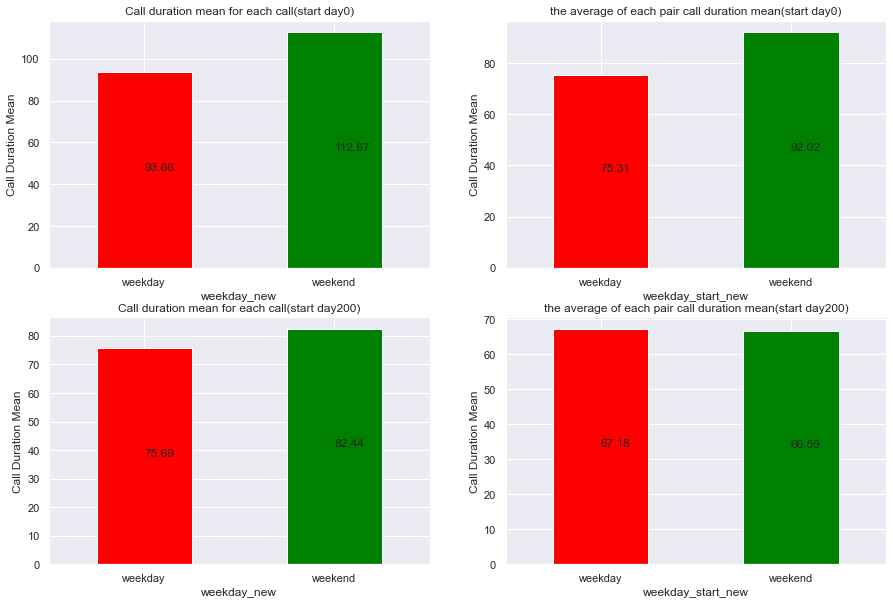

In [67]:
nc = 2
nr = 2
sns.set(rc={'figure.figsize':(15,10)})

plt.subplot(nr, nc, 1)
duration_mean1.plot(kind='bar', title='Call duration mean for each call(start day0)', ylabel='Call Duration Mean', color=['red', 'green'])
plt.xticks(rotation = 0)
addlabels(duration_mean1.index, duration_mean1.values)

plt.subplot(nr, nc, 2)
duration_mean2.plot(kind='bar', title='the average of each pair call duration mean(start day0)', ylabel='Call Duration Mean', color=['red', 'green'])
plt.xticks(rotation = 0)
addlabels(duration_mean2.index, duration_mean2.values)

plt.subplot(nr, nc, 3)
duration_mean3.plot(kind='bar', title='Call duration mean for each call(start day200)', ylabel='Call Duration Mean', color=['red', 'green'])
plt.xticks(rotation = 0)
addlabels(duration_mean3.index, duration_mean3.values)

plt.subplot(nr, nc, 4)
duration_mean4.plot(kind='bar', title='the average of each pair call duration mean(start day200)', ylabel='Call Duration Mean', color=['red', 'green'])
plt.xticks(rotation = 0)
addlabels(duration_mean4.index, duration_mean4.values)